# SEIR model class experiments

Utilities for train, forecasting and plotting are now provided in nb_utils.
Documentation for the helper functions are available as docstrings.

Set the appropriate training parameters and forecast parameters in the 
corresponding cells.

train_eval   
> Train and evaluate models (currently we only support SEIR family). 
  Default configuration parameters for train and test files are 
  provided as train_config.json and test_config.json respectively.
  Search paramters, loss functions etc, are specified in the config
  files.

forecast, plot
> Generate forecasts using a trained model and plotting utilities.

In [1]:
import json
import pandas as pd

from datetime import datetime, timedelta

from nb_utils import train_eval
from nb_utils import forecast
from nb_utils import plot
from nb_utils import plot_m1, plot_m2, plot_m3

## Load default configurations

In [2]:
with open('train_config.json') as f_train, \
    open('test_config.json') as f_test, \
    open('forecast_config.json') as f_forecast:
    default_train_config = json.load(f_train)
    default_test_config = json.load(f_test)
    default_forecast_config = json.load(f_forecast)

## Set the model class

In [3]:
model_class = 'SEIHRD'
default_train_config['model_class'] = model_class
default_test_config['model_class'] = model_class
default_forecast_config['model_class'] = model_class

## Optional: Modify training loss function

In [4]:
variable_and_weights = [('confirmed', 0.25) , ('recovered', 0.25), ('deceased', 0.25), ('hospitalized', 0.25)]
weights = {'metric_name' : 'mape', 'variable_weights' : []}
for (variable, weight) in variable_and_weights:
    weights['variable_weights'].append({
        "variable" : variable,
        "weight" : weight
    })
default_train_config['training_loss_function'].update(weights)

## Training parameters

In [5]:
region = 'bengaluru urban'
region_type = 'district'

In [6]:
#Current day : Last day without the flattening of counts
current_day = datetime.now().date() - timedelta(3)

# Train1 : 1 week interval starting 2 weeks prior to current day
train1_start_date = current_day - timedelta(14)
train1_end_date = current_day - timedelta(8)
train1_run_day = train1_start_date - timedelta(1)

train1_start_date = train1_start_date.strftime("%-m/%-d/%y")
train1_end_date = train1_end_date.strftime("%-m/%-d/%y")
train1_run_day = train1_run_day.strftime("%-m/%-d/%y")

# Train2 : 1 week interval starting 1 week prior to current day
train2_start_date = current_day - timedelta(7)
train2_end_date = current_day
train2_run_day = train2_start_date - timedelta(1)

train2_start_date = train2_start_date.strftime("%-m/%-d/%y")
train2_end_date = train2_end_date.strftime("%-m/%-d/%y")
train2_run_day = train2_run_day.strftime("%-m/%-d/%y")

# Test: 1 week interval prior to current day
test_start_date = current_day - timedelta(7)
test_end_date = current_day
test_run_day = test_start_date - timedelta(1)

test_start_date = test_start_date.strftime("%-m/%-d/%y")
test_end_date = test_end_date.strftime("%-m/%-d/%y")
test_run_day = test_run_day.strftime("%-m/%-d/%y")

## train_eval on the region of interest

In [7]:
params, metrics, train1_params, train2_params = train_eval(region, region_type, 
                                                           train1_start_date, train1_end_date, 
                                                           train2_start_date, train2_end_date, train2_run_day,
                                                           test_start_date, test_end_date,
                                                           default_train_config, default_test_config,
                                                           max_evals = 1000,
                                                           mlflow_log = False,
                                                           name_prefix = region);

t = 7.90                                                
t = 7.90                                                                          
  0%|          | 1/1000 [00:00<02:00,  8.27trial/s, best loss: 1965.0990757502475]

/Users/nayana/.local/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


t = 7.90                                                                          
t = 7.90                                                                         
t = 7.90                                                                         
t = 7.90                                                                          
t = 7.90                                                                          
t = 7.90                                                                         
t = 7.90                                                                         
t = 7.90                                                                         
t = 7.90                                                                          
t = 7.90                                                                          
t = 7.90                                                                          
t = 7.90                                                                          
t = 7.90 

t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                    

t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                         

t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                    

t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                    

t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                         

t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                         

t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                    

t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                    

t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                    

t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                    

t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                    

t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                         

t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                         

t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                         

t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                         

t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                         

t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                         

t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                         

t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                         

t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                         

## Inspect model parameters

In [8]:
train1_params

{'model_parameters': {'EbyCRatio': 0.017877935669255614,
  'F_fatalities': 0.056183407434290115,
  'F_hospitalization': 0.005232625212372633,
  'F_icu': 0.05,
  'IbyCRatio': 0.34684698943406467,
  'LatentEbyCRatio': {'5/13/20': 0.017877935669255614,
   '5/20/20': 0.3419249640170596},
  'LatentIbyCRatio': {'5/13/20': 0.34684698943406467,
   '5/20/20': 0.4308491369147854},
  'MAPE': 4.230050398661872,
  'incubation_period': 5,
  'infectious_period': 8.200617466582438,
  'r0': 1.6580954952332145},
 'model_type': 'SEIHRD',
 'region': 'bengaluru urban',
 'region_type': 'district'}

In [9]:
train2_params

{'model_parameters': {'EbyCRatio': 0.0476187184819922,
  'F_fatalities': 0.06515747099328013,
  'F_hospitalization': 0.0032402771661480608,
  'F_icu': 0.05,
  'IbyCRatio': 0.14336056746551926,
  'LatentEbyCRatio': {'5/20/20': 0.0476187184819922,
   '5/28/20': 0.5530553468424747},
  'LatentIbyCRatio': {'5/20/20': 0.14336056746551926,
   '5/28/20': 0.4491785829278752},
  'MAPE': 2.9004081863974625,
  'incubation_period': 5,
  'infectious_period': 9.510491219406312,
  'r0': 2.9481579730398355},
 'model_type': 'SEIHRD',
 'region': 'bengaluru urban',
 'region_type': 'district'}

In [10]:
metrics

{'TestAll': [{'metric_name': <MetricName.mape: 'mape'>,
   'value': 15.657720593778421,
   'variable_weights': [{'variable': <ForecastVariable.confirmed: 'confirmed'>,
     'weight': 0.25},
    {'variable': <ForecastVariable.recovered: 'recovered'>, 'weight': 0.25},
    {'variable': <ForecastVariable.deceased: 'deceased'>, 'weight': 0.25},
    {'variable': <ForecastVariable.hospitalized: 'hospitalized'>,
     'weight': 0.25}]},
  {'metric_name': <MetricName.mape: 'mape'>,
   'value': 17.510788680699218,
   'variable_weights': [{'variable': <ForecastVariable.confirmed: 'confirmed'>,
     'weight': 1.0}]},
  {'metric_name': <MetricName.mape: 'mape'>,
   'value': 24.695452039148265,
   'variable_weights': [{'variable': <ForecastVariable.hospitalized: 'hospitalized'>,
     'weight': 1.0}]},
  {'metric_name': <MetricName.mape: 'mape'>,
   'value': 13.173918086424832,
   'variable_weights': [{'variable': <ForecastVariable.recovered: 'recovered'>,
     'weight': 1.0}]},
  {'metric_name': <Met

## Generate Plots

t = 7.90

/Users/nayana/.local/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/nayana/.local/lib/python3.6/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,



t = 8.90


/Users/nayana/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


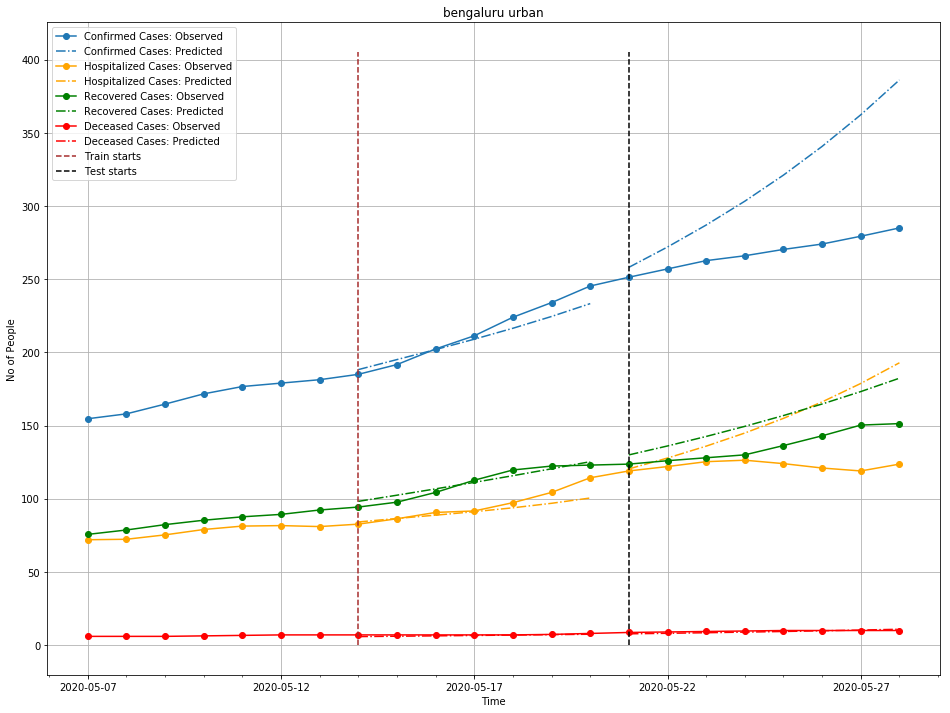

In [11]:
%matplotlib inline
plot_m1(train1_params, train1_run_day, train1_start_date, train1_end_date, 
        test_run_day, test_start_date, test_end_date, 
        rolling_average = False, uncertainty = False, 
        plot_config = 'plot_config.json', plot_name = region+'_m1.png')

/Users/nayana/.local/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/nayana/.local/lib/python3.6/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


t = 8.90


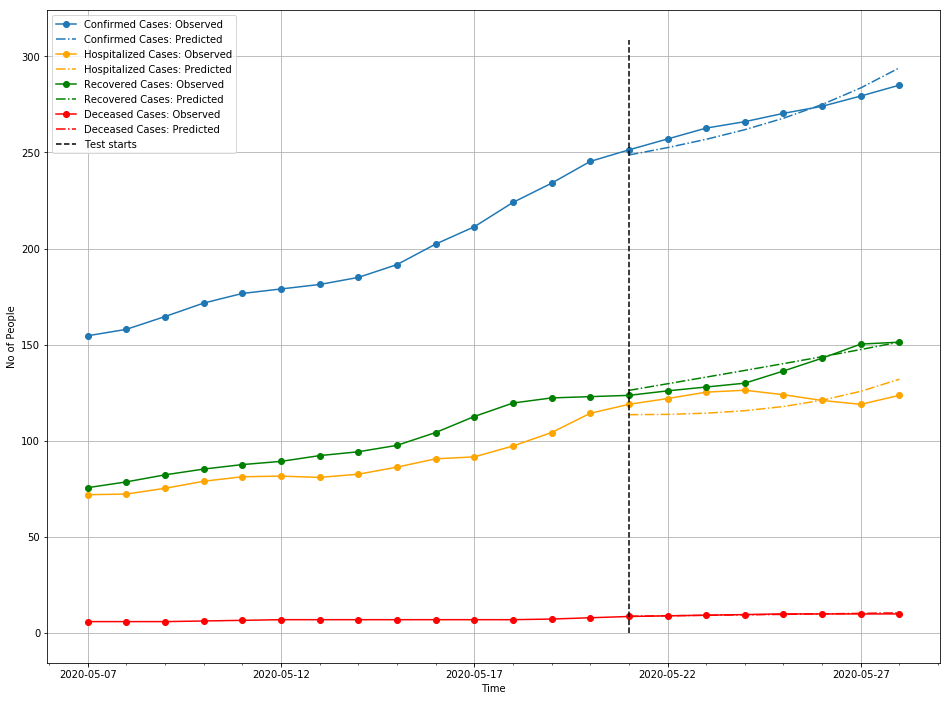

In [12]:
%matplotlib inline
plot_m2(train2_params, train1_start_date, train1_end_date, 
        test_run_day, test_start_date, test_end_date, plot_name = region+'_m2.png')

/Users/nayana/.local/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/nayana/.local/lib/python3.6/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


t = 31.90


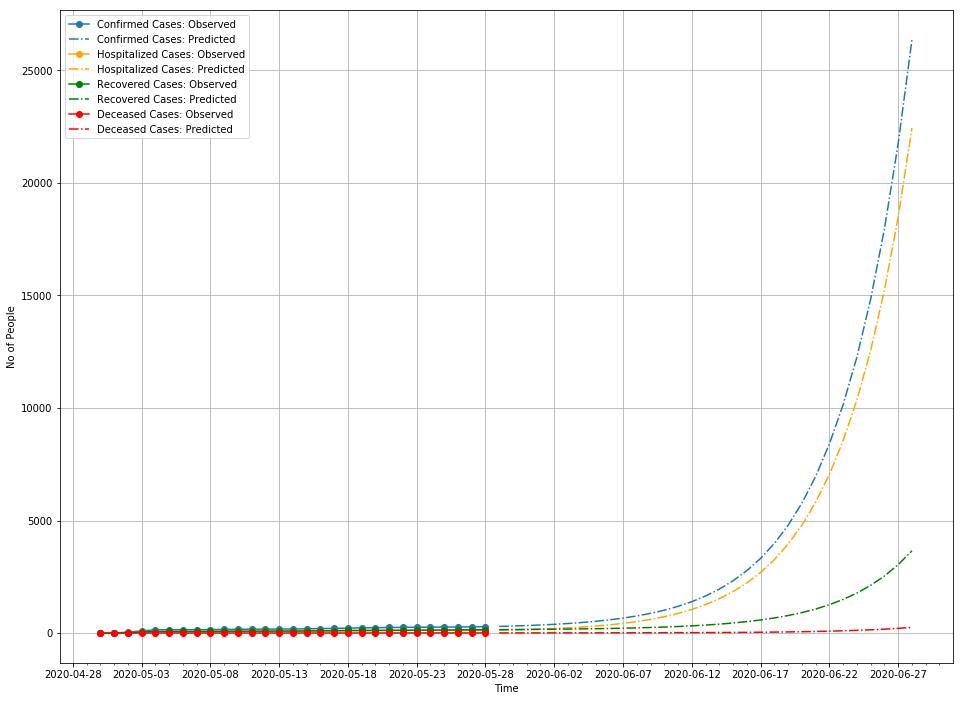

In [13]:
%matplotlib inline
forecast_start_date = (current_day + timedelta(1)).strftime("%-m/%-d/%y")
forecast_length = 30 # Forecast for 30 days
plot_m3(train2_params, train1_start_date, 
        forecast_start_date, forecast_length, plot_name = region+'_m3.png')